In [18]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Now we import some tools from adtk library

In [19]:
# We import the tool used for better plotting experience that comes with adtk
from adtk.visualization import plot
# Importing the Detectors from adtk, i used a wild card here but its better to import every module by its own
from adtk.detector import *
# Importing the validate_series function to validate the time series before using it
from adtk.data import validate_series


#### Importing the data 

In [20]:
df = pd.read_csv('stockholm_temperature_time_series.csv')
# We convert the time column to datetime and set it as the index

df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')
df = validate_series(df)
df.head()

,value
time,
1980-01-01,-4.7
1980-02-01,-6.2
1980-03-01,-3.1
1980-04-01,4.8
1980-05-01,7.8


### From here, we will do the anomaly detection

#### Starting with Treshold detector

High threshold: 21.355904274130864, Low threshold: -7.832400000626591


[<Axes: >]

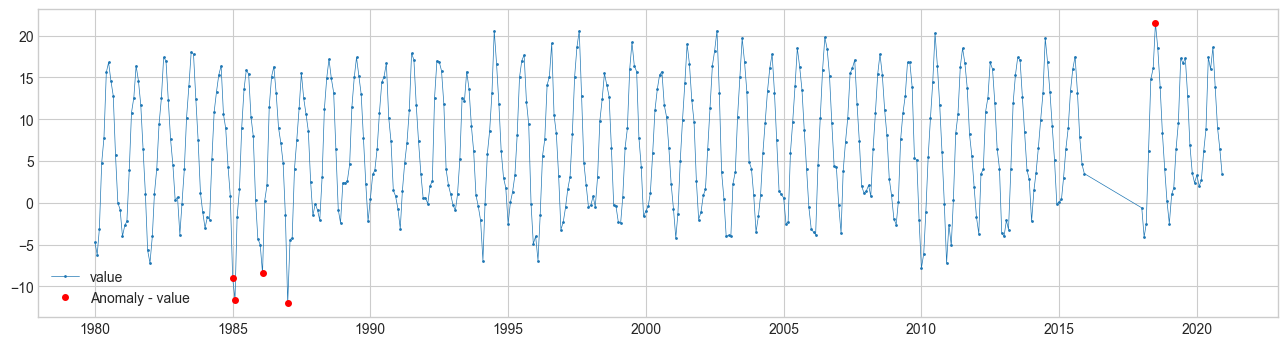

In [21]:
# We will try to get the treshold values to do the detection
# We will use the mean and standard deviation to get the values

temperatures = np.array(df['value'])

# Calculate mean and standard deviation using numpy
mean_temp = np.mean(temperatures)
std_dev_temp = np.std(temperatures)

# Set thresholds based on mean and standard deviation, we took the constant 2 here
high_threshold = mean_temp + 2 * std_dev_temp
low_threshold = mean_temp - 2 * std_dev_temp

print(f"High threshold: {high_threshold}, Low threshold: {low_threshold}")

# Use these thresholds in ThresholdAD
treshold_ad = ThresholdAD(high=high_threshold, low=low_threshold)
anomalies = treshold_ad.detect(df)
plot(df['value'], anomaly= anomalies, anomaly_color='red', anomaly_tag="marker")

#### Now we go for the qualtile detector method

[<Axes: >]

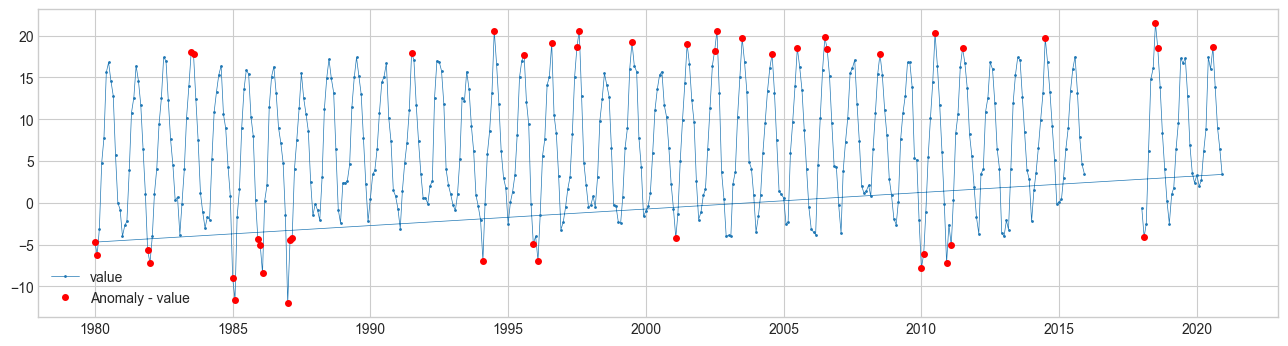

In [52]:
# Applying quantile detector to find the anomalies
quantile_ad = QuantileAD(high=0.95, low=0.05) # We set the quantile to 95% and 5%
anomalies = quantile_ad.fit_detect(df) # We fit the detector and detect the anomalies
plot(df['value'], anomaly= anomalies, anomaly_color='red', anomaly_tag="marker")



#### The inter quartile range method

[<Axes: >]

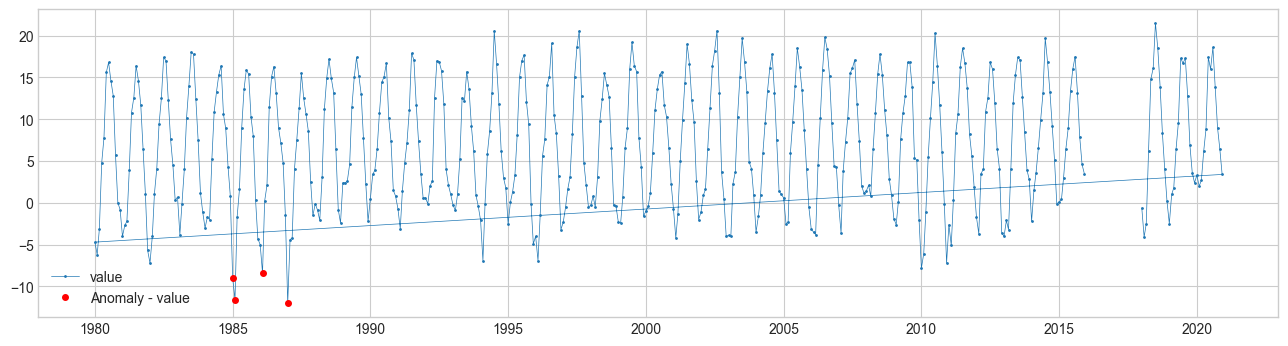

In [6]:
# Applying iqr detector to find the anomalies
iqr = InterQuartileRangeAD(c=0.7) 
anomalies = iqr.fit_detect(df)
plot(df['value'], anomaly= anomalies, anomaly_color='red', anomaly_tag="marker")

#### Volatility shift detector method

[<Axes: >]

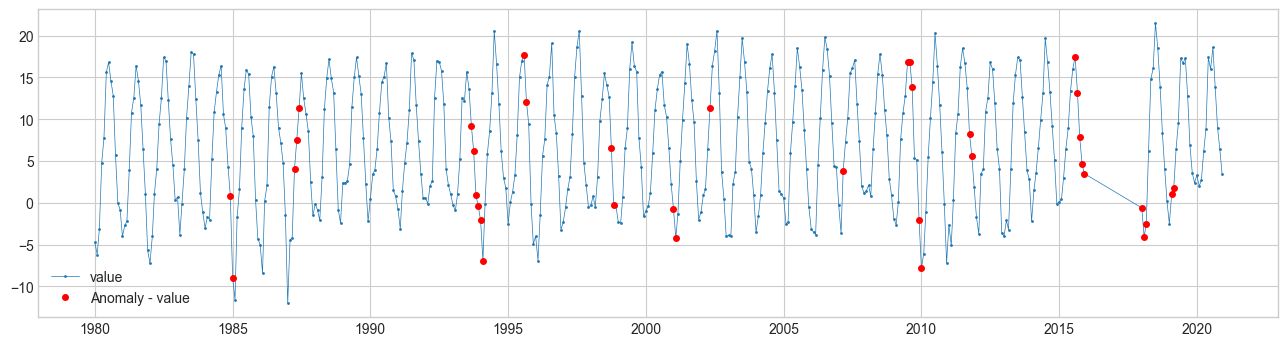

In [16]:
# applying volatility detector to find the anomalies
volatility_ad = VolatilityShiftAD(c=0.7, window=12)
anomalies = volatility_ad.fit_detect(df)
plot(df['value'], anomaly= anomalies, anomaly_color='red', anomaly_tag="marker")

### If you didn't understand a method from the previous ones or how they work, refer to the adtk docs, it is full of informations